<a href="https://colab.research.google.com/github/santhoshsrivi/study/blob/main/time_series_forecast_a_comprehensive_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # <a id='4.1'> 1. Importing Necessary libraries </a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
from dateutil.parser import parse
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams.update({'figure.figsize':(10,7),'figure.dpi':120})

# <a id='4.2'> 2. Loading Dataset </a>

In [10]:
df=pd.read_csv('/content/Dataset- Superstore (2015-2018).csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014/01/21,2014/01/23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


import numpy as np
from google.colab import autoviz
df_4534208346593997453 = autoviz.get_df('df_4534208346593997453')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4534208346593997453, *['Row ID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1138292246404473980 = autoviz.get_df('df_1138292246404473980')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1138292246404473980, *['Postal Code'], **{})
chart

import numpy as np
from google.colab import autoviz
df_801464138108974263 = autoviz.get_df('df_801464138108974263')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_801464138108974263, *['Sales'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6942139142388882189 = autoviz.get_df('df_6942139142388882189')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6942139142388882189, *['Quantity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7869752955475992168 = autoviz.get_df('df_7869752955475992168')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7869752955475992168, *['Row ID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1222413146540163623 = autoviz.get_df('df_1222413146540163623')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1222413146540163623, *['Postal Code'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2989268341572083511 = autoviz.get_df('df_2989268341572083511')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2989268341572083511, *['Sales'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4249557258518397461 = autoviz.get_df('df_4249557258518397461')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4249557258518397461, *['Quantity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1686617548558253493 = autoviz.get_df('df_1686617548558253493')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1686617548558253493, *['Ship Mode'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8374503919172009275 = autoviz.get_df('df_8374503919172009275')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8374503919172009275, *['Segment'], **{})
chart

import numpy as np
from google.colab import autoviz
df_107908373379380366 = autoviz.get_df('df_107908373379380366')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_107908373379380366, *['Region'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1829337691258280071 = autoviz.get_df('df_1829337691258280071')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1829337691258280071, *['Category'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2205618242734334839 = autoviz.get_df('df_2205618242734334839')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_2205618242734334839, *[[['Row ID', 'Postal Code'], ['Postal Code', 'Sales'], ['Sales', 'Quantity'], ['Quantity', 'Discount']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_5135666941240604563 = autoviz.get_df('df_5135666941240604563')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_5135666941240604563, *['Ship Mode', 'Segment'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7270740547822052273 = autoviz.get_df('df_7270740547822052273')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_7270740547822052273, *['Segment', 'Region'], **{})
chart

import numpy as np
from google.colab import autoviz
df_643060893957890087 = autoviz.get_df('df_643060893957890087')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_643060893957890087, *['Region', 'Category'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2486728908206173274 = autoviz.get_df('df_2486728908206173274')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2486728908206173274, *['Row ID', 'Ship Mode'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_8956653990527762541 = autoviz.get_df('df_8956653990527762541')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8956653990527762541, *['Row ID', 'Segment'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_8399557763392917708 = autoviz.get_df('df_8399557763392917708')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8399557763392917708, *['Row ID', 'Region'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_1576871673973642450 = autoviz.get_df('df_1576871673973642450')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1576871673973642450, *['Row ID', 'Category'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_5744694353893533380 = autoviz.get_df('df_5744694353893533380')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5744694353893533380, *['Order Date', 'Postal Code', 'Ship Mode'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4933630164578348819 = autoviz.get_df('df_4933630164578348819')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4933630164578348819, *['Order Date', 'Postal Code', 'Segment'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6766018818066870377 = autoviz.get_df('df_6766018818066870377')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6766018818066870377, *['Order Date', 'Postal Code', 'Region'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4383070547983613181 = autoviz.get_df('df_4383070547983613181')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4383070547983613181, *['Order Date', 'Postal Code', 'Category'], **{})
chart

In [11]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

## Forcasting for the 'Office Supplies' sales:

In [12]:
OS= df.loc[df['Category']=='Office Supplies']
OS.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


### We have a four year of Office Supplies data:

In [16]:
OS['Order Date'].min()


'2014/01/03'

In [15]:
OS['Order Date'].max()

'2017/12/30'

# <a id='4.3'> 3. Data Processing </a>

### In this process, we will removing unrelevant variables, handling missing data, aggregate sales by date.

### Our focus in this kernel is the Sale of Office Supplier over the time series. Therefore, we will skip only two columns:Oder Date and Sales

In [17]:
# Drop unrelevant variables:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']


OS.drop(cols, axis=1, inplace= True)
OS

<ipython-input-17-4a420783bd56>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OS.drop(cols, axis=1, inplace= True)


,Order Date,Sales
2,2016/06/12,14.620
4,2015/10/11,22.368
6,2014/06/09,7.280
8,2014/06/09,18.504
9,2014/06/09,114.900
...,...,...
9982,2016/09/22,35.560
9984,2015/05/17,31.500
9985,2015/05/17,55.600
9992,2017/02/26,29.600


In [18]:
### Check out missing values:
OS.isnull().sum()

Order Date    0
Sales         0
dtype: int64

### There are no missing values, so we move to the next step.

### Aggregate sum of Office Supplies by date:

In [19]:
OS= OS.groupby('Order Date')['Sales'].sum().reset_index()
OS.head()

,Order Date,Sales
0,2014/01/03,16.448
1,2014/01/04,288.060
2,2014/01/05,19.536
3,2014/01/06,685.340
4,2014/01/07,10.430


# <a id='4.4'> 4. Import Data with indexing time series data </a>

In [20]:
OS['Order Date'] = pd.to_datetime(df['Order Date'])
OS= OS.set_index('Order Date')
OS

,Sales
Order Date,
2016-11-08,16.448
2016-11-08,288.060
2016-06-12,19.536
2015-10-11,685.340
2015-10-11,10.430
...,...
2014-09-29,814.594
2014-09-29,13.248
2014-09-29,1091.244


# <a id='4.5'> 5. Data Visualization </a>

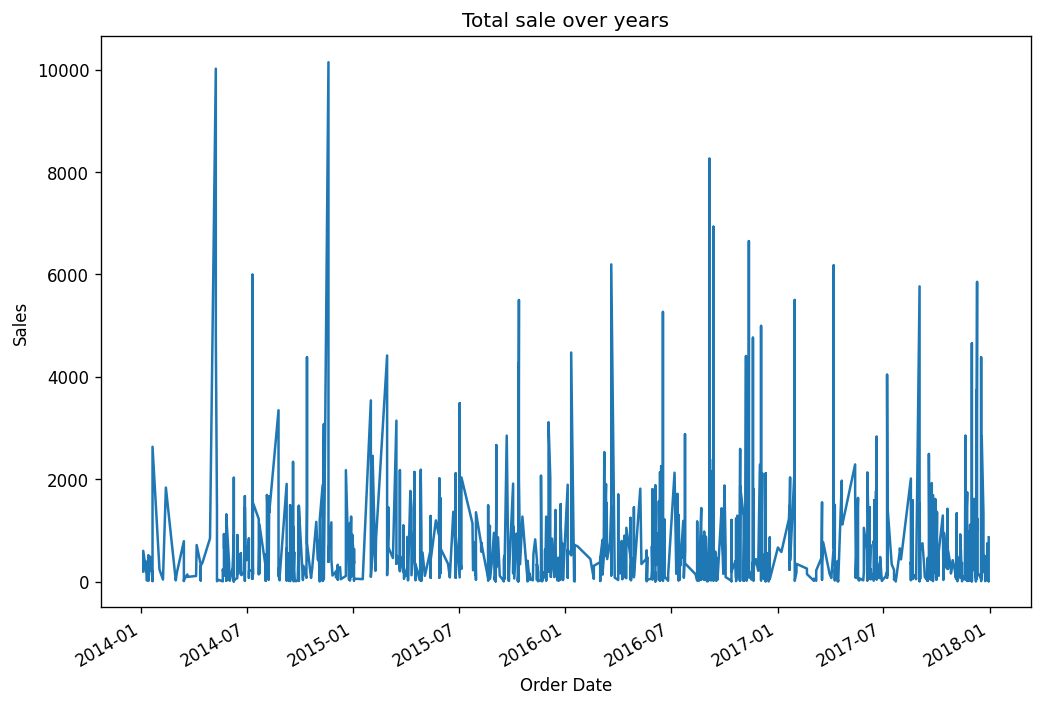

In [21]:
OS['Sales'].plot()
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Total sale over years')
plt.show()

### We should use the resample function the time series data by Month and use the averages monthly values

In [22]:
#create new DataFrame
monthly_OS = pd.DataFrame()

monthly_OS['Sales'] = OS['Sales'].resample('MS').mean()

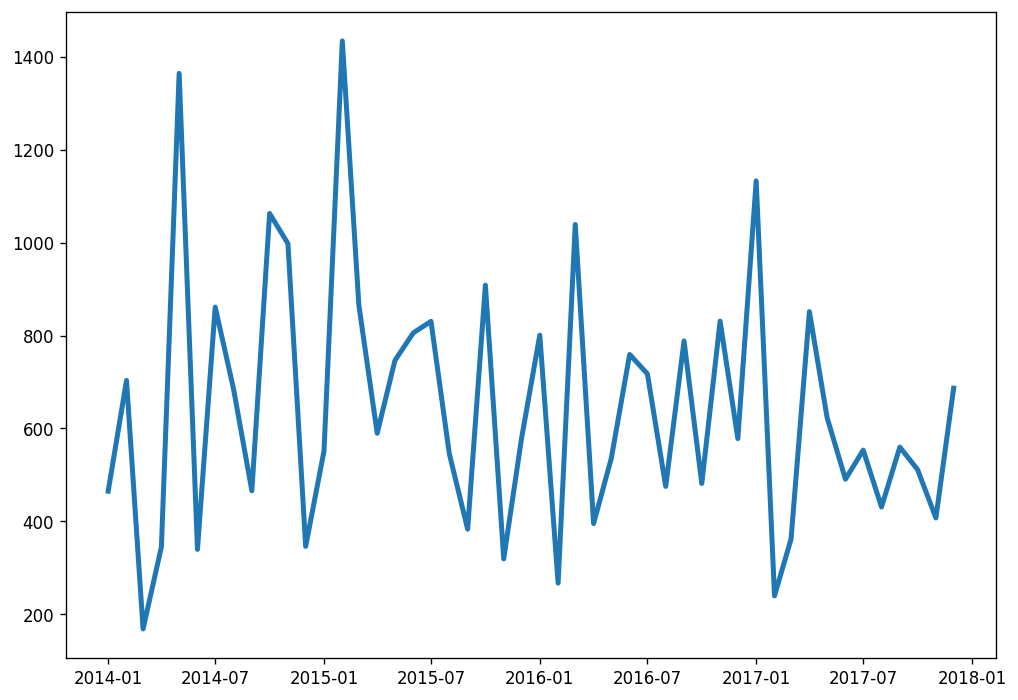

In [23]:
#plot weekly sales data
plt.plot(monthly_OS.index, monthly_OS.Sales, linewidth=3)

## Since all values are positive, you can show this on both sides of the Y axis to emphasize the growth.

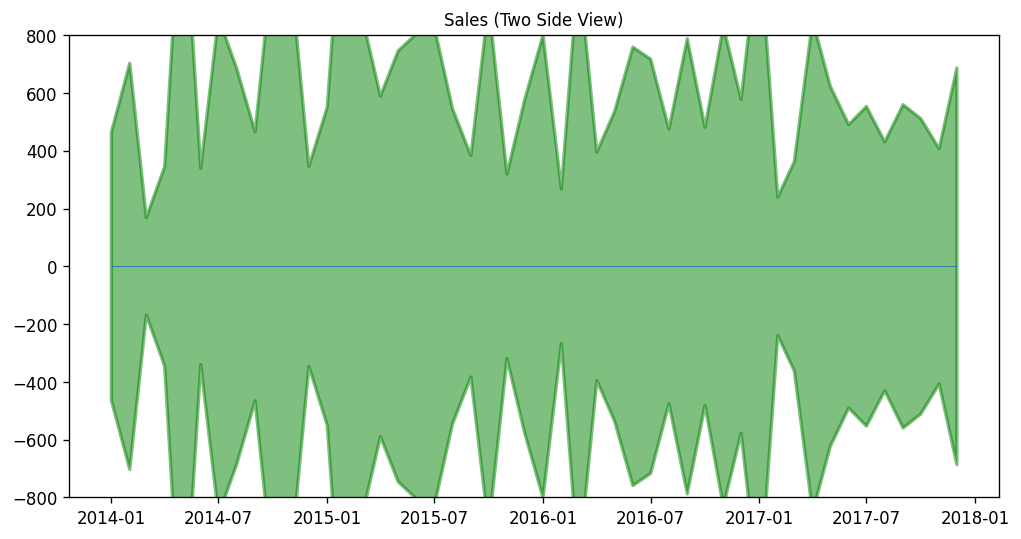

In [31]:
x= monthly_OS.index
y1= monthly_OS['Sales'].values

fig, ax = plt.subplots(1, 1, figsize=(10,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='green')
plt.ylim(-800, 800)
plt.title('Sales (Two Side View)', fontsize=10)
plt.hlines(y=0, xmin=np.min(monthly_OS.index), xmax=np.max(monthly_OS.index), linewidth=.5)
plt.show()

We can nicely visualize the trend and how it varies each year in a nice year-wise boxplot.

Likewise, we can do a month-wise boxplot to visualize the monthly distributions.

Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

We can group the data at seasonal intervals and see how the values are distributed within a given year or month and how it compares over time.

In [26]:
OS['year'] = [d.year for d in OS.index]
OS['month'] = [d.strftime('%b') for d in OS.index]
years= OS['year'].unique()
years

array([2016, 2015, 2014, 2017])

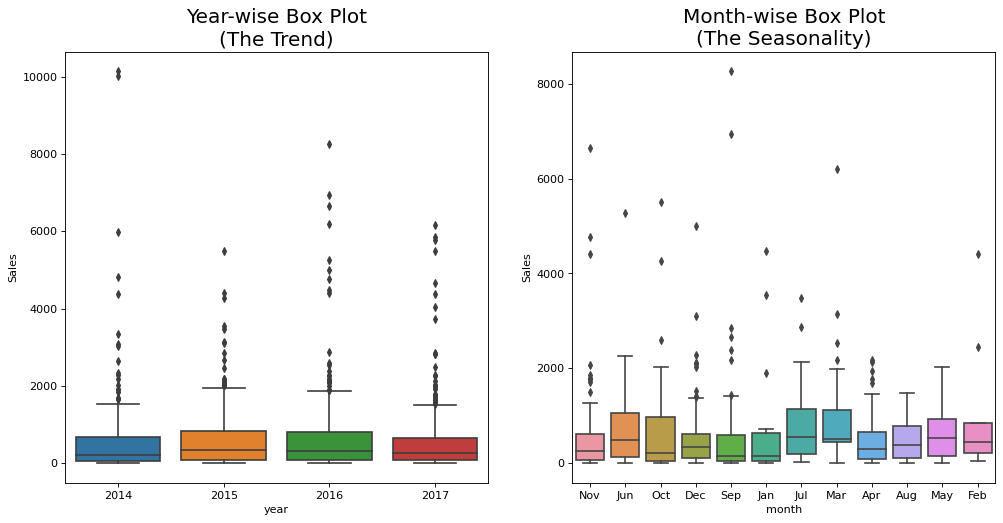

In [35]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(15,7), dpi= 80)
sns.boxplot(x='year', y='Sales', data=OS, ax=axes[0])
sns.boxplot(x='month', y='Sales', data=OS.loc[~OS.year.isin([2014,2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

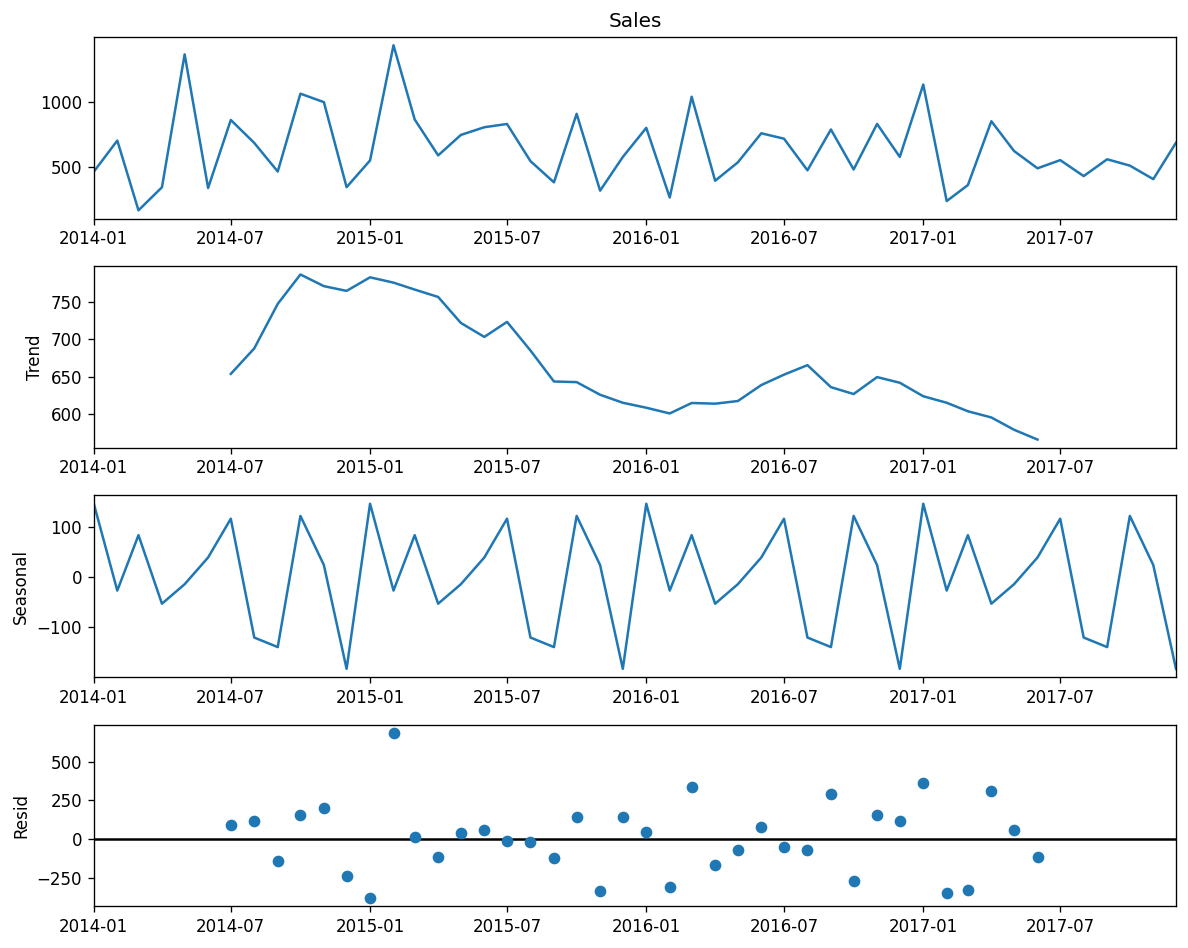

In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

decomposition = sm.tsa.seasonal_decompose(monthly_OS['Sales'], model='additive')
fig = decomposition.plot()
plt.show()

The plots show the data is seasonality

# <a id='4.6'> 6. Check Stationary of the Dataset </a>

 Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

- constant mean
- constant variance
- an autocovariance that does not depend on time.

Formally, we check the stationary using the following:

- Plotting Rolling Statistic: we can plot the moving average or moving variance and see if it varies with time.

- Dickey- Fuller Test: The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

### First, we will plot the Rolling Statistics Plot

In [38]:
#Determing rolling statistics
moving_avg = monthly_OS.rolling(12).mean()
moving_std= monthly_OS.rolling(12).std()

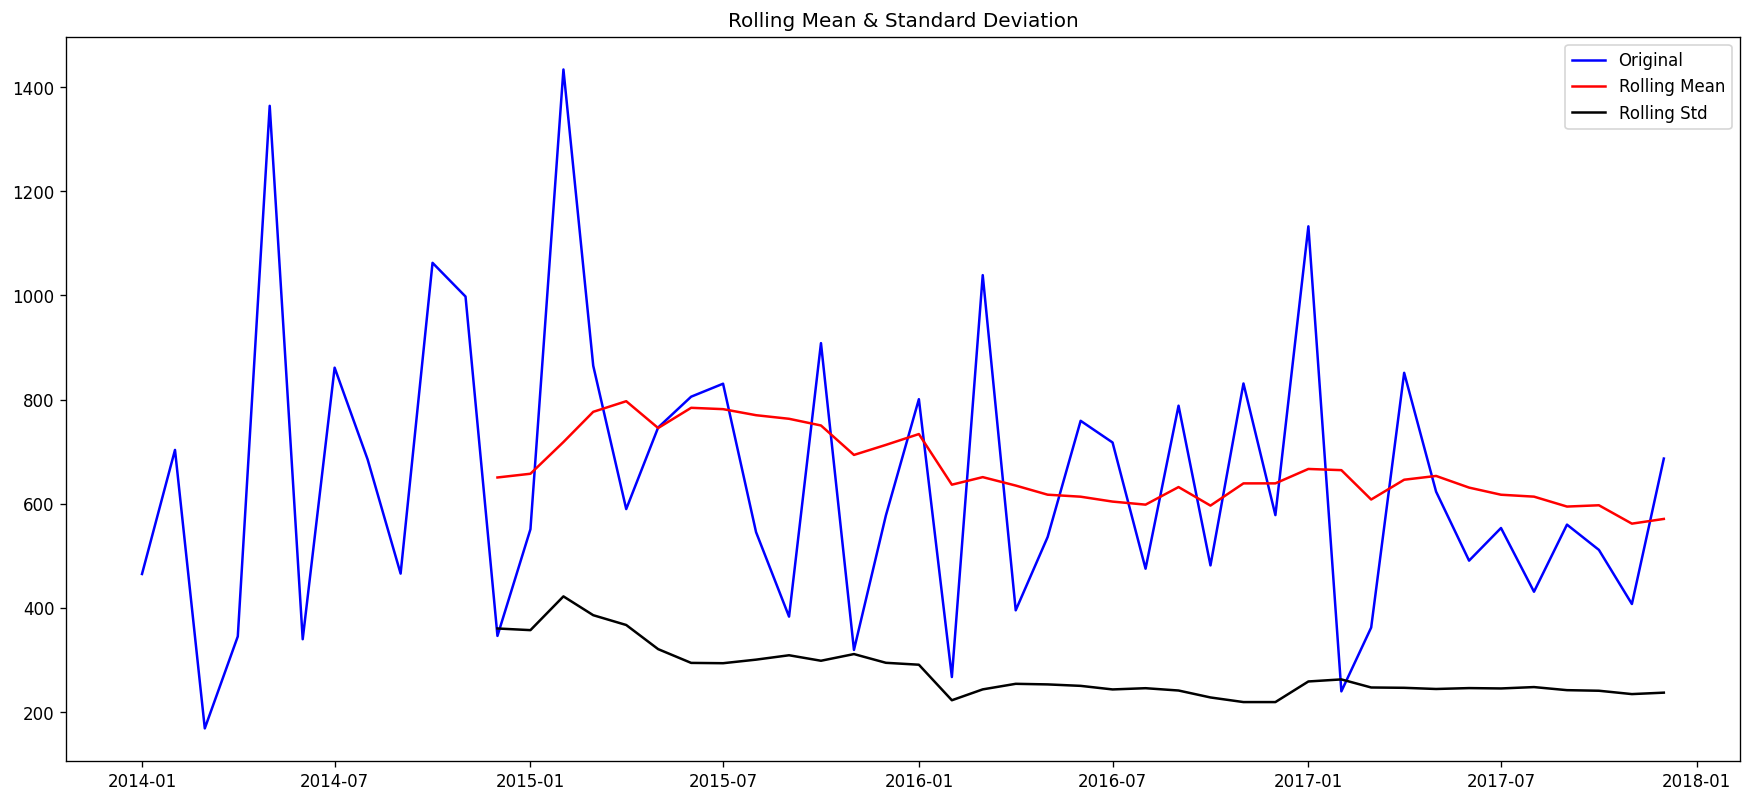

In [ ]:
#Plot rolling statistics:
orig = plt.plot(monthly_OS, color='blue',label='Original')
mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
std = plt.plot(moving_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### Now, we will conduct the Dickey-Fuller test:


In [39]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(monthly_OS, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -1.630238
p-value                         0.467366
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64



Test statistic: -1.630238

P-value: 0.467366

Since the p-value is not less than .05, we fail to reject the null hypothesis.

This means the time series is <span style="color:red"> non-stationary. </span>

In other words, it has some time-dependent structure and does not have constant variance over time.

# <a id='4.7'> 7. Make a Time Series Stationary </a>

## a) Log Transform:

In [41]:
do= pd.read_csv('/content/Dataset- Superstore (2015-2018).csv')
store= do.loc[do['Category']=='Office Supplies']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
store.drop(cols, axis=1, inplace=True)
store

<ipython-input-41-27ce4adc5dbc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store.drop(cols, axis=1, inplace=True)


,Order Date,Sales
2,2016/06/12,14.620
4,2015/10/11,22.368
6,2014/06/09,7.280
8,2014/06/09,18.504
9,2014/06/09,114.900
...,...,...
9982,2016/09/22,35.560
9984,2015/05/17,31.500
9985,2015/05/17,55.600
9992,2017/02/26,29.600


In [42]:
store = store.groupby('Order Date')['Sales'].sum().reset_index()
store

,Order Date,Sales
0,2014/01/03,16.448
1,2014/01/04,288.060
2,2014/01/05,19.536
3,2014/01/06,685.340
4,2014/01/07,10.430
...,...,...
1143,2017/12/26,814.594
1144,2017/12/27,13.248
1145,2017/12/28,1091.244
1146,2017/12/29,282.440


In [43]:
store = store.set_index('Order Date')
store.index

Index(['2014/01/03', '2014/01/04', '2014/01/05', '2014/01/06', '2014/01/07',
       '2014/01/09', '2014/01/10', '2014/01/13', '2014/01/16', '2014/01/18',
       ...
       '2017/12/21', '2017/12/22', '2017/12/23', '2017/12/24', '2017/12/25',
       '2017/12/26', '2017/12/27', '2017/12/28', '2017/12/29', '2017/12/30'],
      dtype='object', name='Order Date', length=1148)

In [44]:
#create new DataFrame:
store.index = pd.to_datetime(store.index)

y = store['Sales'].resample('MS').mean()


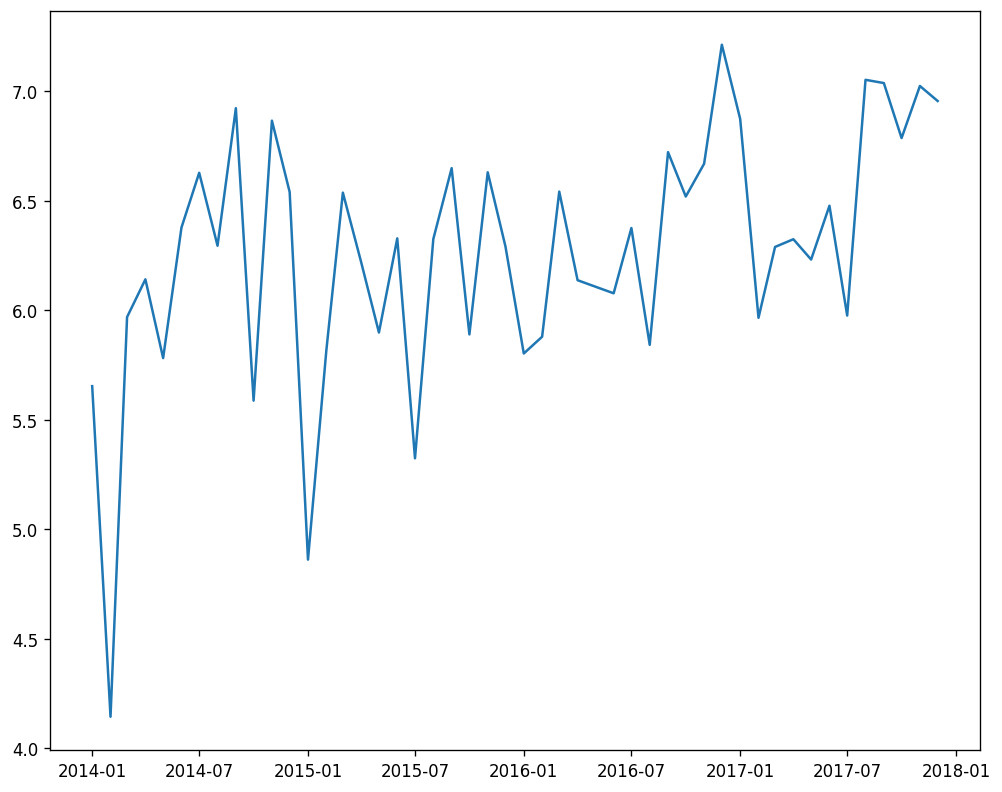

In [45]:
## Lets take a log transform here for simplicity:
ts_log = np.log(y)
plt.plot(ts_log)

In this case, we can see the plot is not a forward trend in the data. So, take a log transform is not a solution to make a time-series stationary

## b) Moving Average:

In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values.

Pandas has specific functions defined for determining rolling statistics.

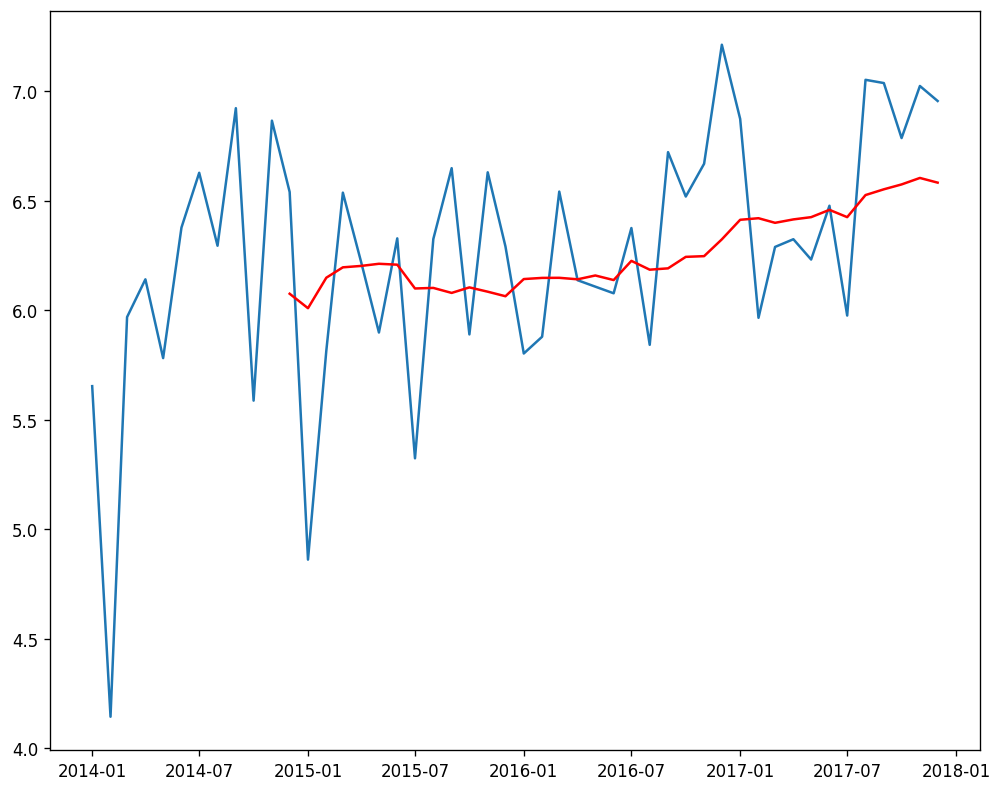

In [46]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

The red line shows the rolling mean.

Lets subtract this from the original series.

Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values. This can be observed as:

In [47]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Order Date
2014-01-01         NaN
2014-02-01         NaN
2014-03-01         NaN
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01         NaN
2014-11-01         NaN
2014-12-01    0.464652
Freq: MS, Name: Sales, dtype: float64

Dropping these NaN values and check the plots to test stationarity.

In [48]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print ('Results of Dickey-Fuller Test:')

    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

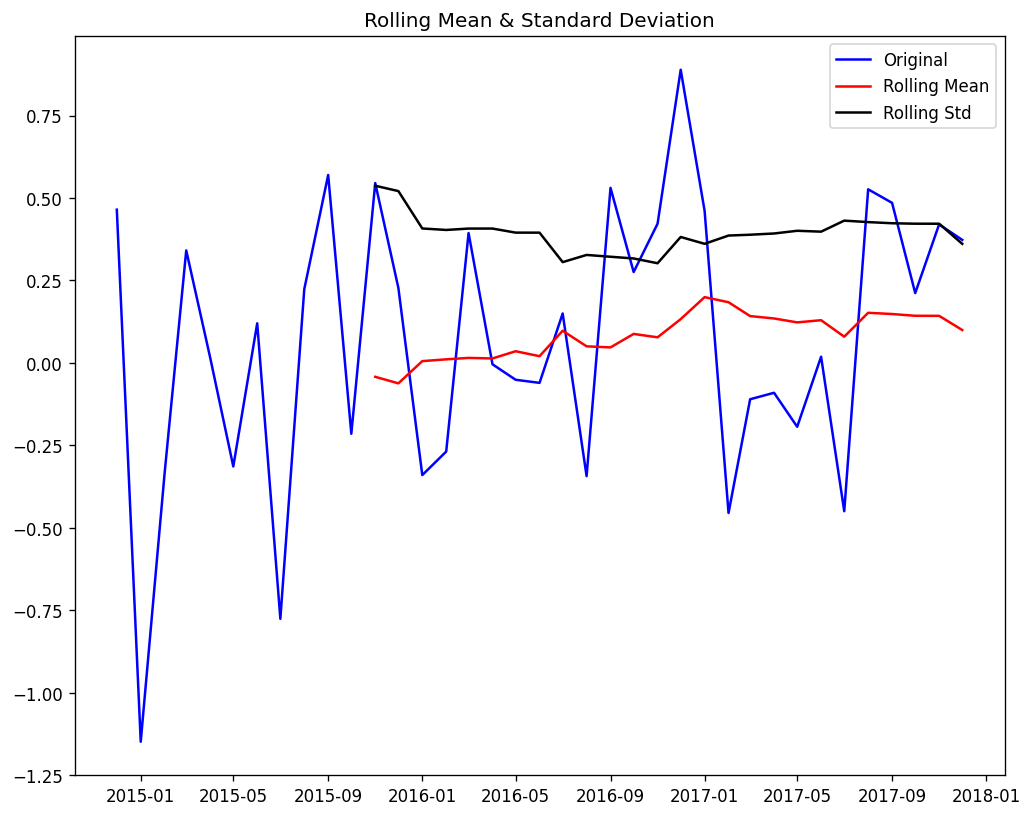

Results of Dickey-Fuller Test:
Test Statistic                 -5.626996
p-value                         0.000001
#Lags Used                      0.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


In [49]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

The rolling values appear to be varying slightly but there is no specific trend.

Also, the test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series.

## c) Exponentially weighted moving average:

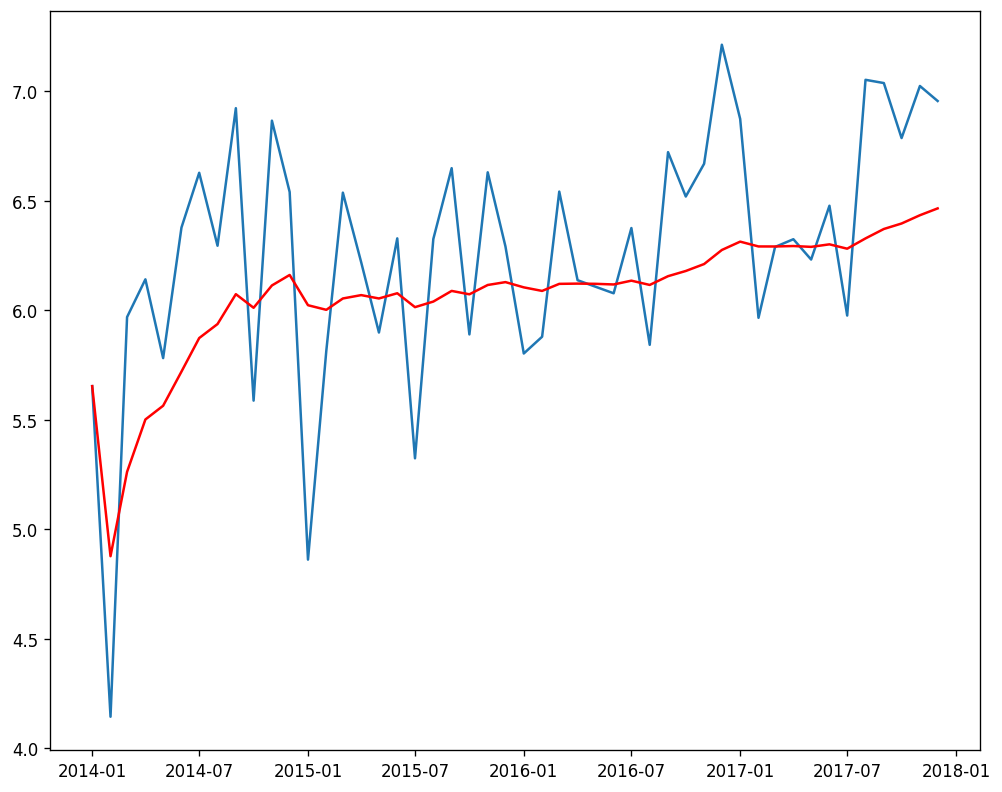

In [50]:
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

Note that here the parameter ‘halflife’ is used to define the amount of exponential decay.
This is just an assumption here and would depend largely on the business domain.

Other parameters like span and center of mass can also be used to define decay which are discussed in the link shared above.

Now, let’s remove this from series and check stationarity:

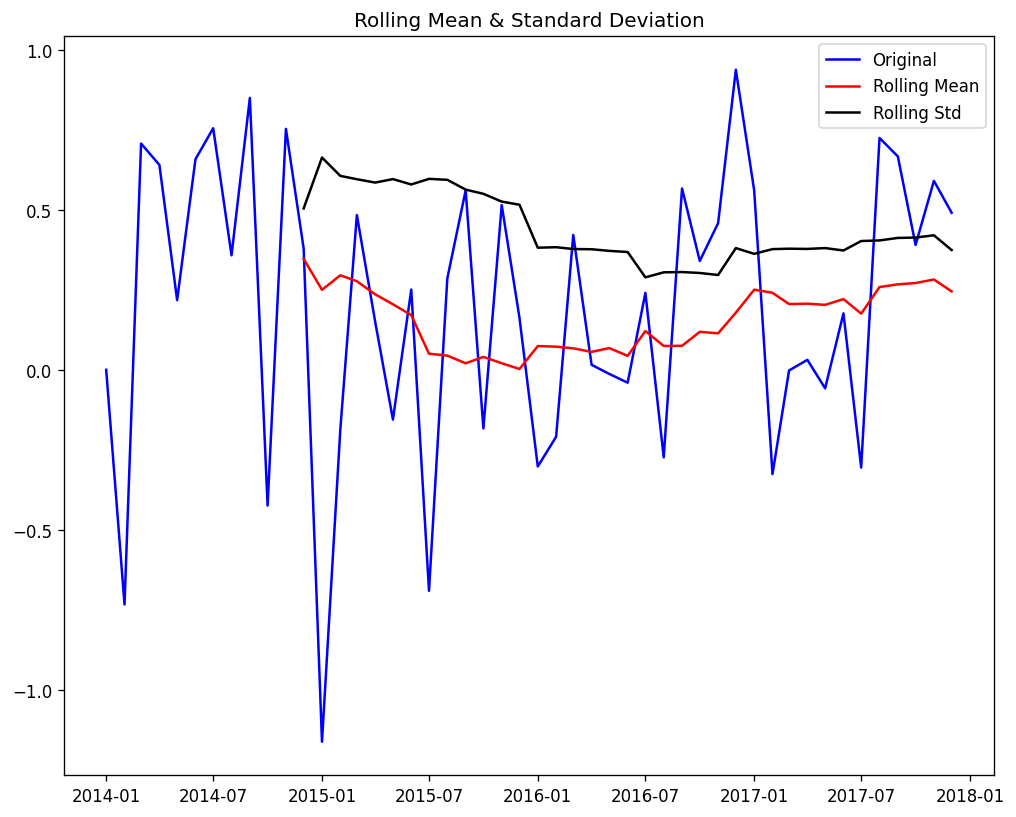

Results of Dickey-Fuller Test:
Test Statistic                 -2.967356
p-value                         0.038057
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [51]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)


Since the p-value is  less than .05, we fail to acept the null hypothesis: this time-series is stationary

## d) Differencing:

One of the most common methods of dealing with both trend and seasonality is differencing.

In this technique, we take the difference of the observation at a particular instant with that at the previous instant.


This mostly works well in improving stationarity.

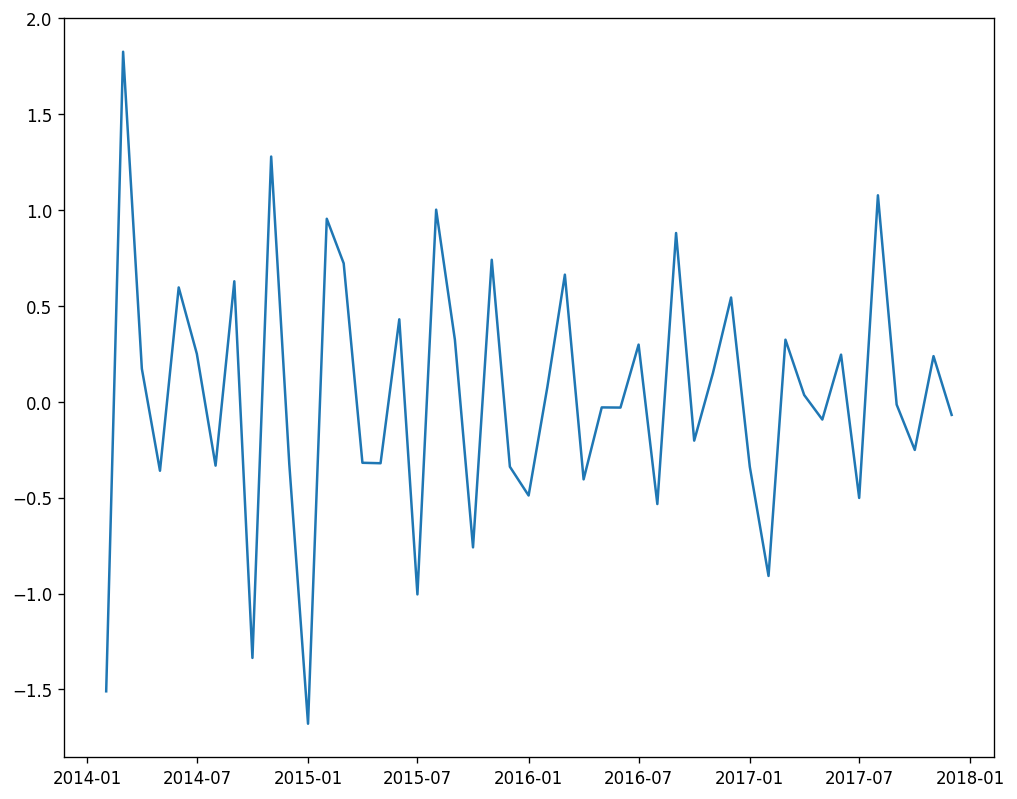

In [52]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

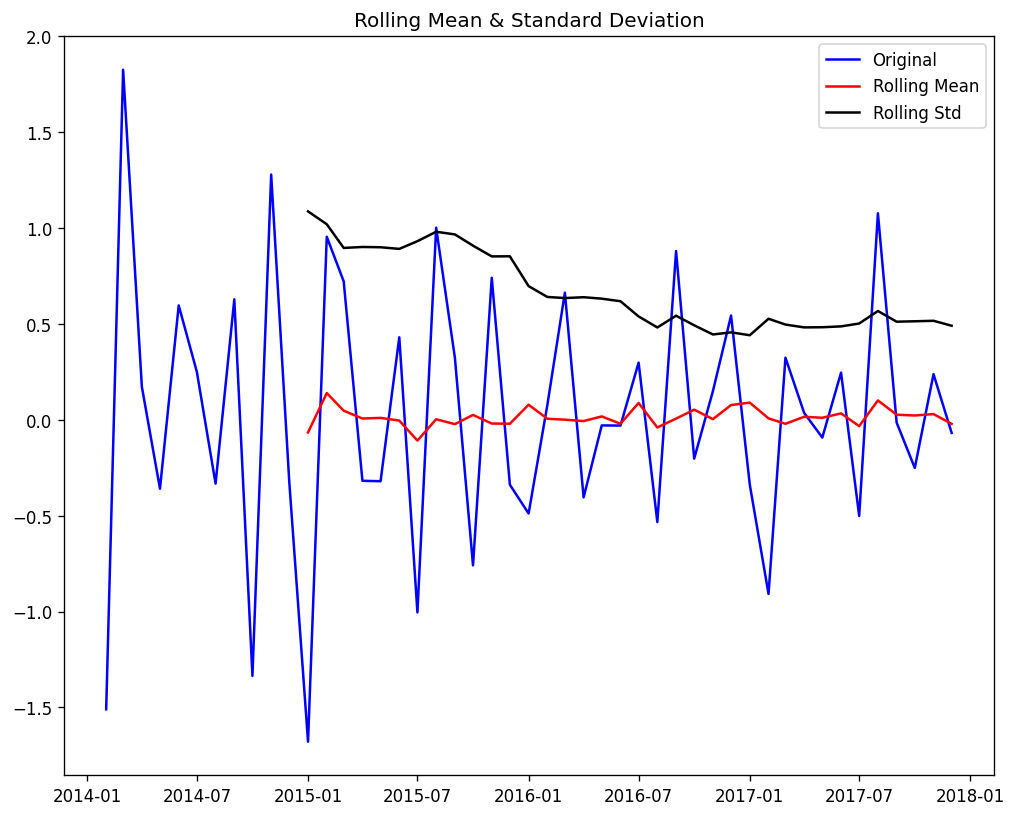

Results of Dickey-Fuller Test:
Test Statistic                 -4.771865
p-value                         0.000062
#Lags Used                      9.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [53]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

We can see that the mean and std variations have small variations with time.

Also, the Dickey-Fuller test statistic is less than the 1% critical value, thus the TS is stationary with 99% confidence.



## e) Decomposing:

In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

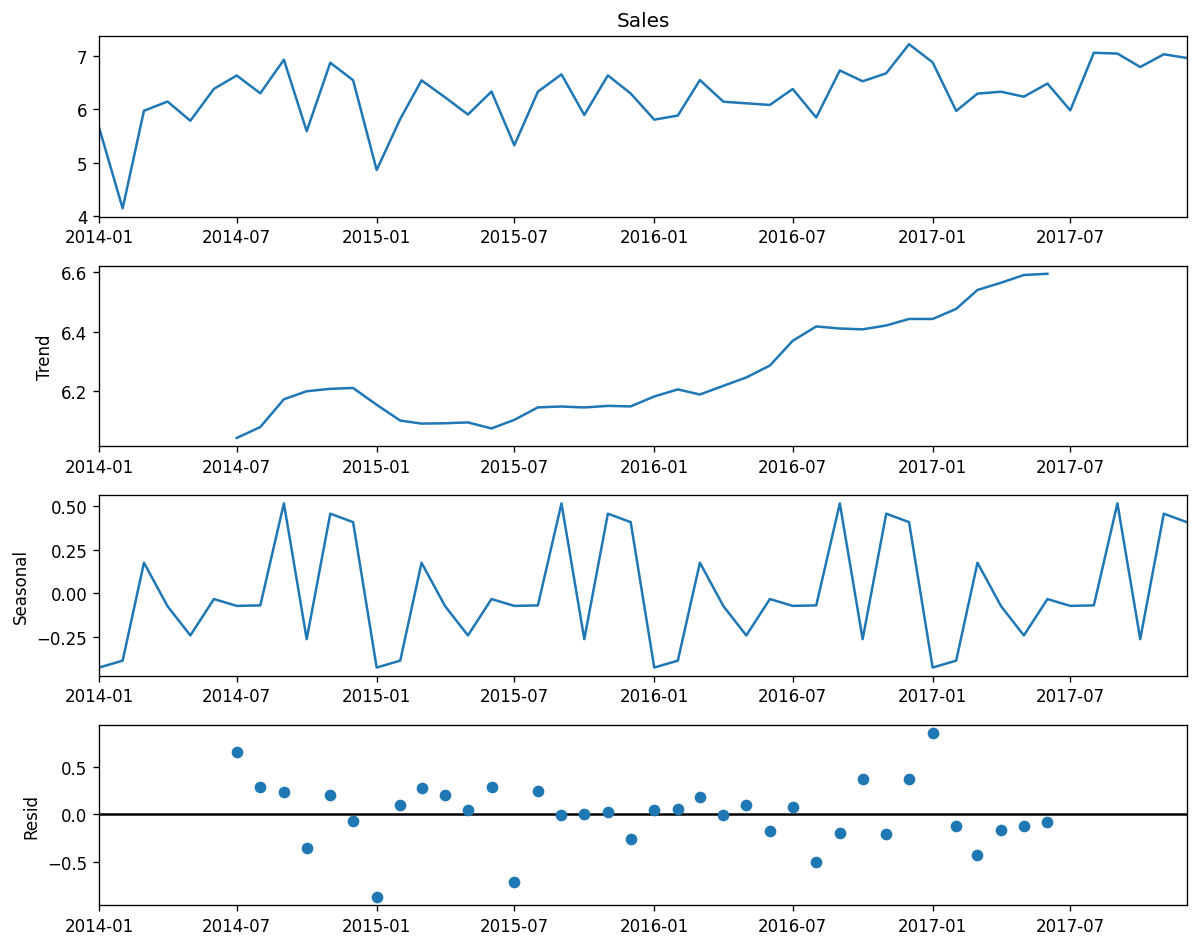

In [55]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

decomposition = sm.tsa.seasonal_decompose(ts_log, model='additive')
fig = decomposition.plot()
plt.show()

Here we can see that the trend, seasonality are separated out from data and we can model the residuals.

Lets check stationarity of residuals:

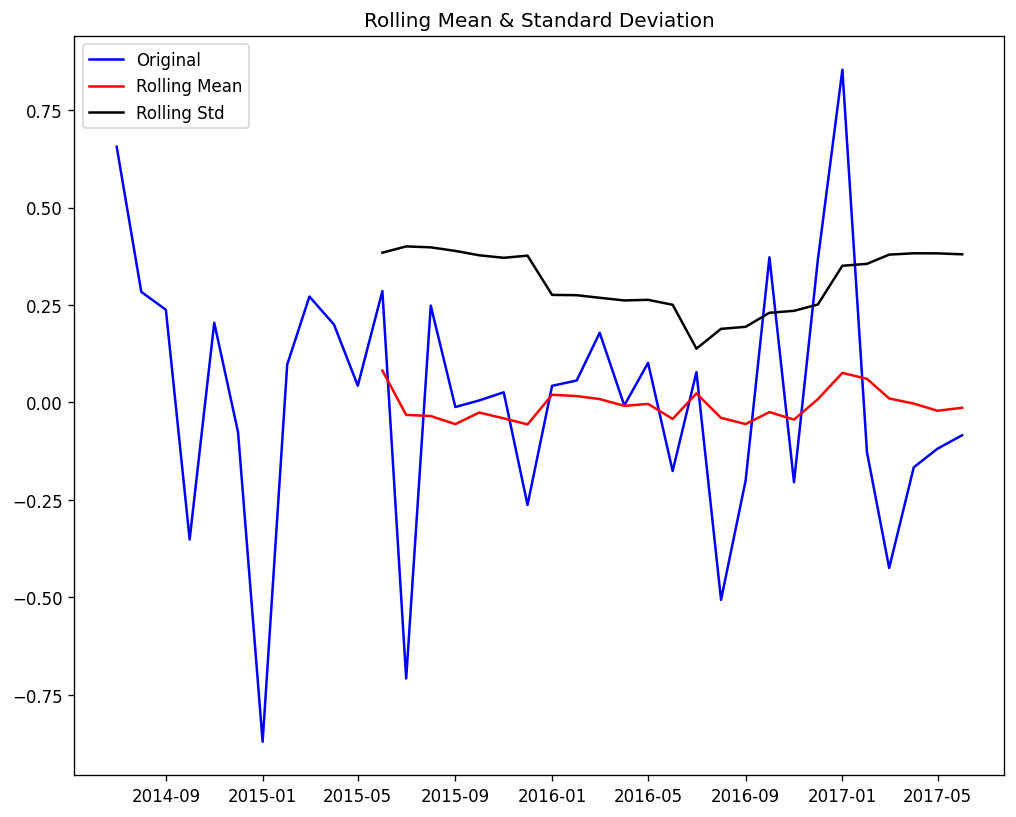

Results of Dickey-Fuller Test:
Test Statistic                 -4.901459
p-value                         0.000035
#Lags Used                      4.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
residual = decomposition.resid

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)


The Dickey-Fuller test statistic is significantly lower than the 1% critical value.

So this TS is very close to stationary.

# <a id='4.8'> 8. Time Series Forecasting with ARIMA </a>

ARIMA stands for Auto-Regressive Integrated Moving Averages.

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

- **Number of AR (Auto-Regressive) terms (p):** AR terms are just lags of dependent variable.


- **Number of MA (Moving Average) terms (q):** MA terms are lagged forecast errors in prediction equation.

- **Number of Differences (d):** These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

There are 3 way to define p,q,d:

* ACF and PACF plot

* Auto_arima

* Loops

auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

I will split the train and test set, apply autoarima to decide p,q,d. Then get the predicted value for test set,plot the train,test, prect data and then evaluate the forcast accuracy.

If the result from forecast accuracy doesn't support the ARIMA model, we should choose different method to forecast the data. One suggestion is Seasonal ARIMA model called SARIMAX


## <a id='4.9'> 8.1. Train Test Split: </a>

In [57]:


train= y[:40]
test= y[40:]





In [58]:
!pip install pmdarima
import pmdarima

from pmdarima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.3 MB/s eta 0:00:00


## <a id='4.10'> 8.2 Hyperparameters of ARIMA model p,d,q using auto_arima </a>

In [59]:
 auto_arima(train, test='adf',seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=592.497, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=576.965, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=559.020, Time=0.08 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=554.143, Time=0.09 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=555.183, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.61 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=555.965, Time=0.41 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 2.454 seconds


ARIMA(order=(3, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [60]:

auto_arima(y,test='adf',       # use adftest to find optimal 'd'
                       # maximum p and q
                                 # frequency of series
                       # let model determine 'd'
                      seasonal=True,   # No Seasonality


                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=668.770, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=682.234, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=673.518, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=680.349, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=668.928, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.98 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=670.928, Time=0.45 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=669.659, Time=0.85 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 11.279 secon

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

## <a id= '4.11' > 8.3  Build ARIMA model: </a>

In [61]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(1,1,1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -273.088
Date:                Fri, 28 Jul 2023   AIC                            552.176
Time:                        08:52:33   BIC                            557.167
Sample:                    01-01-2014   HQIC                           553.967
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1424      0.249      0.573      0.567      -0.345       0.630
ma.L1         -0.9118      0.143     -6.398      0.000      -1.191      -0.632
sigma2      6.796e+04   1.48e+04      4.607      0.000     3.9e+04    9.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 1.34
Prob(Q):                              0.60   Prob(JB):                         0.51
Heteroskedasticity (H):               0.84   Skew:                             0.45
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predict test dataset:

In [62]:
pred= model.predict(start=len(train), end=(len(y)-1),dynamic=True)
pred

2017-05-01    609.236647
2017-06-01    616.500446
2017-07-01    617.534861
2017-08-01    617.682168
2017-09-01    617.703146
2017-10-01    617.706133
2017-11-01    617.706559
2017-12-01    617.706619
Freq: MS, Name: predicted_mean, dtype: float64

In [63]:
test

Order Date
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64

## <a id ='4.12'> 8.4. ARIMA- Model Evaluation: using MAPE </a>

Mean Absolute Percentage Error (MAPE):  MAPE is defined as the percentage of the average of absolute difference between forecasted values and true values, divided by true value.

In [64]:
from  sklearn.metrics import mean_absolute_percentage_error

mape= mean_absolute_percentage_error(test, pred)

print('MAPE: %f' %mape)

MAPE: 0.363205


The lower the MAPE, the better the model is. Our model have considerably high MAPE.

Let's plot the predict value to see what can be the reason for the low accuracy

## <a id='8.13'> 8.5. Plot prediction for test value:</a>

<Axes: xlabel='Order Date'>

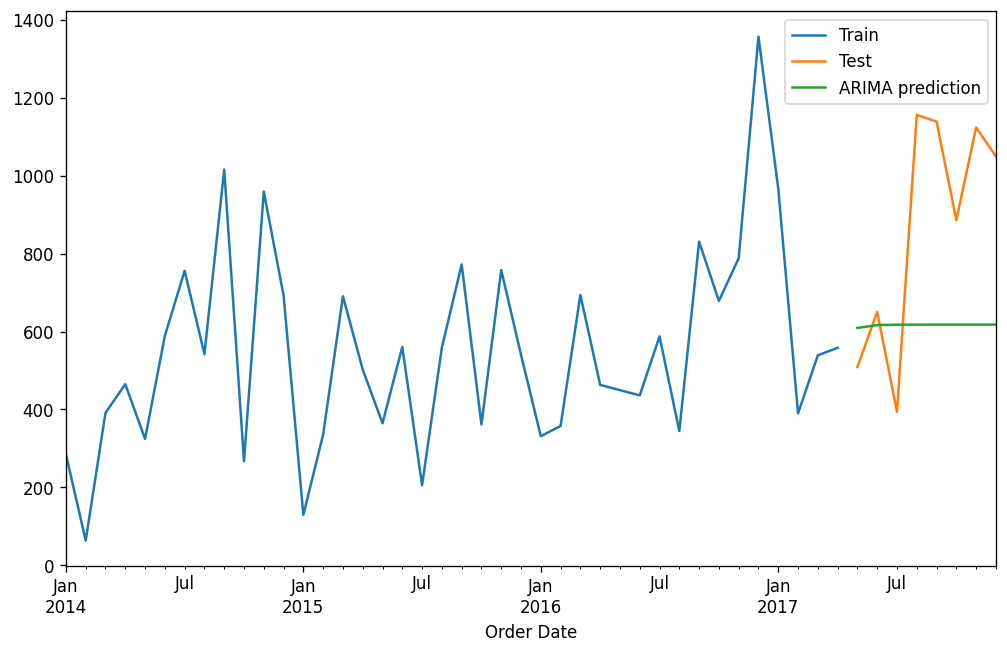

In [65]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pred.plot(legend=True, label='ARIMA prediction')

## The problem of ARIMA prediction is it doesnt show the season trend of data.

## The solution for this problem is using Seasonal ARIMA called SARIMAX function!

## <a id='9'>9. FORECAST DATA USING SARIMAX model:</a>

In [66]:
import statsmodels.api as sm
model1=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,12))

results=model1.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   40
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -189.243
Date:                            Fri, 28 Jul 2023   AIC                            388.486
Time:                                    08:53:06   BIC                            394.965
Sample:                                01-01-2014   HQIC                           390.413
                                     - 04-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2075      0.300      0.693      0.489      -0.380       0.795
ma.L1         -0.9253      0.326     -2.838      0.005      -1.564      -0.286
ar.S.L12       0.2317      0.758      0.305      0.760      -1.255       1.718
ma.S.L12      -0.9971      0.465     -2.143      0.032      -1.909      -0.085
sigma2      4.794e+04   9.81e-06   4.89e+09      0.000    4.79e+04    4.79e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.39
Prob(Q):                              0.98   Prob(JB):                         0.18
Heteroskedasticity (H):               2.18   Skew:                             0.63
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.6e+25. Standard errors may be unstable.
"""

In [67]:
pre=results.predict(start= len(train), end= (len(y)-1),dynamic=True)
pre

2017-05-01     524.235673
2017-06-01     636.977881
2017-07-01     686.335914
2017-08-01     583.602409
2017-09-01     997.204193
2017-10-01     638.851069
2017-11-01     957.402034
2017-12-01    1119.289500
Freq: MS, Name: predicted_mean, dtype: float64

## Plot Forecast Data:

<Axes: xlabel='Order Date'>

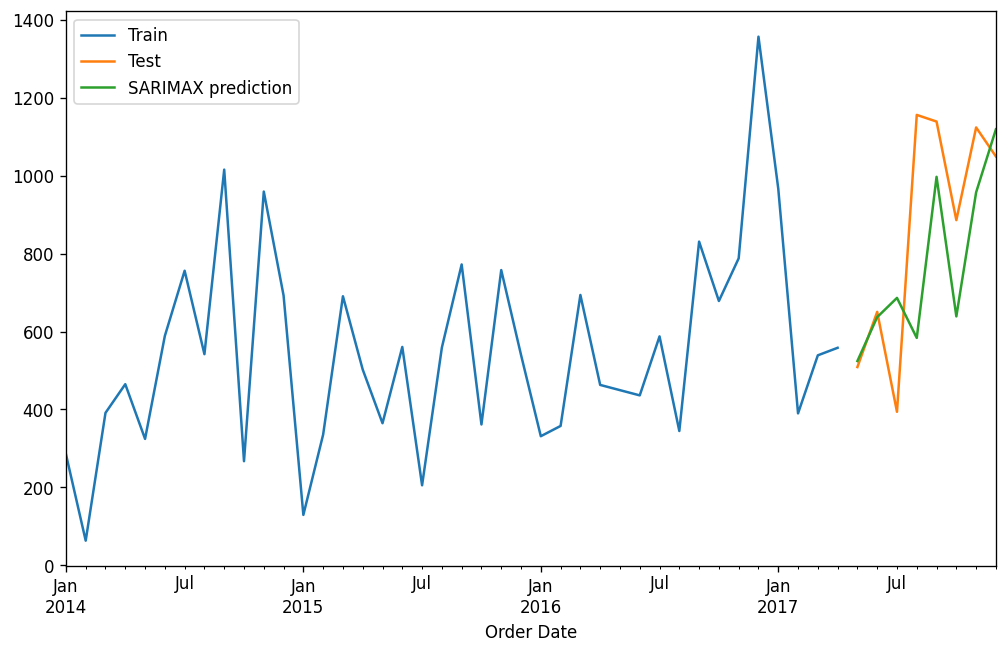

In [68]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pre.plot(legend=True, label='SARIMAX prediction')

# <a id='9.1'> 9.1 SARIMAX MODEL EVALUATION:  MAPE </a>

In [69]:
mape= mean_absolute_percentage_error(test, pre)

print('MAPE1: %f' %mape)

MAPE1: 0.238374


### The model is improved!!! We can coutinue use SARIMAX to forecast the Office Supplier's Sale

## <a id='9.2'> 9.2. PREDICT FUTURE SALE WITH ARIMAX:</a>

In [70]:
future_sale= results.predict(start= len(y), end=(len(y)+12))
future_sale

2018-01-01     733.831015
2018-02-01     467.389846
2018-03-01     714.995411
2018-04-01     671.121802
2018-05-01     602.589590
2018-06-01     738.378253
2018-07-01     762.815085
2018-08-01     692.278656
2018-09-01    1088.997692
2018-10-01     682.932297
2018-11-01    1049.893667
2018-12-01    1117.451712
2019-01-01     733.055101
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='Order Date'>

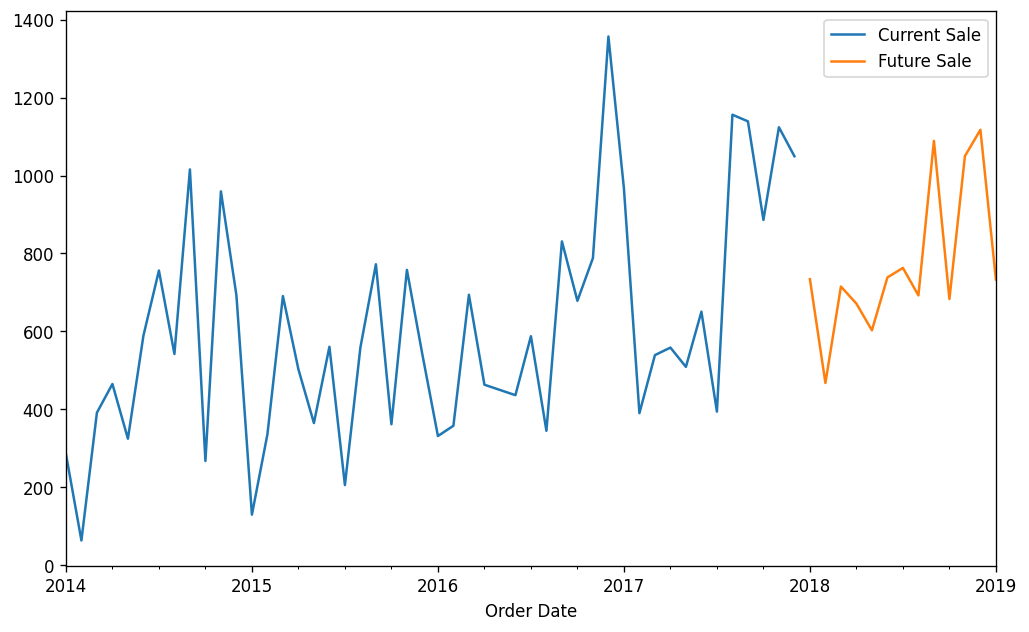

In [71]:
y.plot(legend=True, label='Current Sale', figsize=(10,6))

future_sale.plot(legend= True, label='Future Sale')
